In [129]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

## Loading the data

In [130]:
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10_000)

In [131]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


## Examining the data

In [132]:
print(train_data[1])
print(train_labels[1])

[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]
4


## One-hot encoding the output

In [133]:
# tokenizer de keras
tokenizer = Tokenizer(num_words=10_000)

x_train = tokenizer.sequences_to_matrix(train_data, mode='binary')
x_test = tokenizer.sequences_to_matrix(test_data, mode='binary')

In [134]:
print(x_train)
print(x_train.shape)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
(8982, 10000)


y con Y también, debido a que ya trae varios enteros

In [135]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [136]:
print(y_train)
print(y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(8982, 46)


## Building the model architecture

In [216]:
model = models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(10_000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu',))
model.add(layers.Dense(46, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_101 (Dense)               │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,291,374 (4.93 MB)

 Trainable params: 1,291,374 (4.93 MB)

 Non-trainable params: 0 (0.00 B)

In [217]:
x_split = int(len(x_train)*0.7)
y_split = int(len(y_train)*0.7)

x_val = x_train[:x_split]
partial_x_train = x_train[x_split:]

y_val = y_train[:y_split]
partial_y_train =  y_train[y_split:]

In [218]:
hist = model.fit(partial_x_train, partial_y_train,
            batch_size=512,
            epochs=15,
            validation_data=(x_val, y_val))

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.1877 - loss: 3.7415 - val_accuracy: 0.5166 - val_loss: 3.2767
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5076 - loss: 3.0964 - val_accuracy: 0.5252 - val_loss: 2.5855
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5280 - loss: 2.4372 - val_accuracy: 0.5443 - val_loss: 2.0861
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5841 - loss: 1.9168 - val_accuracy: 0.6164 - val_loss: 1.7508
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6576 - loss: 1.5282 - val_accuracy: 0.6486 - val_loss: 1.5903
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.7061 - loss: 1.3486 - val_accuracy: 0.6690 - val_loss: 1.4781
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.7287 - loss: 1.1818 - val_accuracy: 0.6937 - val_loss: 1.3853
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7612 - loss: 1.0388 - val_accuracy: 0.7139 - val_loss: 1.315

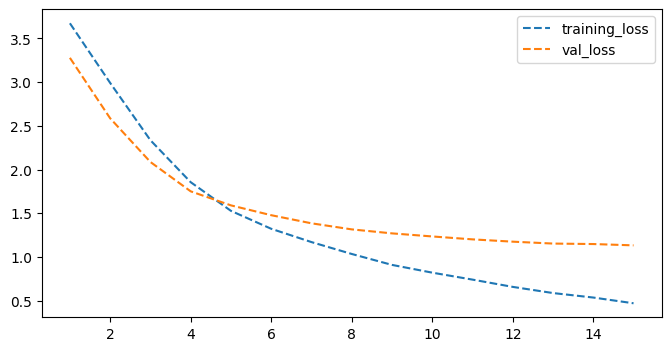

In [219]:
history = hist.history
loss_values = history['loss']
val_loss_values = history['val_loss']

fig = plt.figure(figsize=(8,4))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, '--',label='training_loss')
plt.plot(epoch,val_loss_values, '--',label='val_loss')
plt.legend()
plt.show()

## Evaluating the model

In [220]:
model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7582 - loss: 1.1425


[1.1897932291030884, 0.7471059560775757]